In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Image, Latex
import ipywidgets as widgets
%matplotlib nbagg

# Vecino distraído

En esta actividad, echaremos un vistazo al siguiente problema.

>Vas a salir de la ciudad y le pides a tu vecino que riegue tu planta favorita. Sin agua, tiene un 80% de posibilidades de morir. Con el agua, la probabilidad de que su planta muera es del 15%. Tu estas 90% seguro de que tu vecino recordará regar la planta.
>1. ¿Cuál es la probabilidad de que tu planta esté viva cuando regreses?
>2. Si tu planta está muerta cuando llegas, ¿cuál es la probabilidad de que tu vecino se haya olvidado de regarla?

Intentemos entender lo que eso significa a través de los conceptos de probabilidad clásicos.

## Espacio de Muestra

Nuestro experimento es "viajar y observar lo que sucedió en nuestra planta cuando regresemos". El espacio de muestra, es decir, el conjunto $\Omega$ que contiene todos los resultados de nuestro experimento, tiene dos resultados posibles: cuando regresamos, nuestra planta está viva (llamaremos a este evento $A$) o muerta.

Formalmente, en matemáticas, representamos un evento $A$ como un subconjunto del conjunto $\Omega$. Por lo tanto, la probabilidad de que ocurra el evento $A$ puede verse como la proporción del subconjunto $A$ con respecto al conjunto $\Omega$. Por supuesto, para hacer esto necesitamos una forma de *medir* el "tamaño" de cada uno de estos conjuntos (y ahí es donde la [Teoría de la medida](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_medida) entra en juego). En nuestro caso, podemos simplificar: asumimos que nuestros conjuntos tienen un número finito de elementos, por lo que podemos definir el tamaño del conjunto como el número de elementos que contiene. Denotamos esto como $\#A$ (la **cardinalidad** de $A$).

Ahora, como no hay otros resultados posibles, el evento "la planta está muerta" es el *complemento* del evento $A$ en $\Omega$. Podemos decir que $A$ y $A^C$ definen una *partición* en $\Omega$, ya que
- $\Omega = A\cup A^C$;
- $A\cap A^C=\emptyset$.

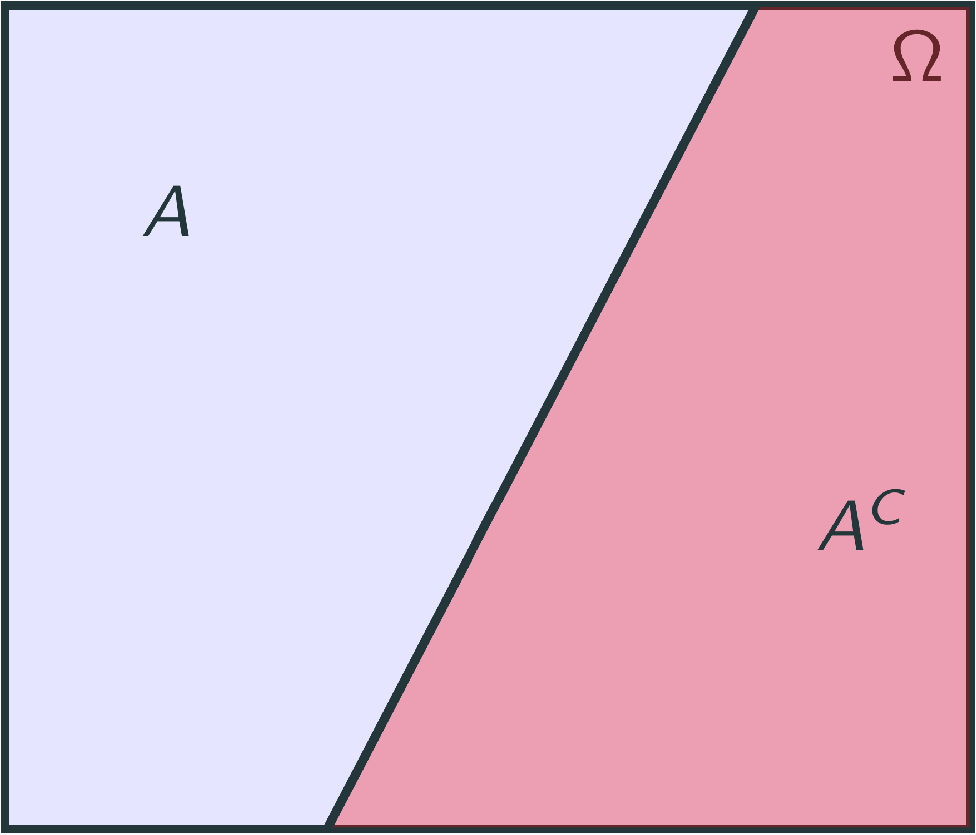

In [3]:
Image("../extra_files/partition1.png")

Hay otros dos eventos que también nos interesan aquí: nuestro vecino recordó que debe regar nuestra planta (Llamaremos esto el evento $B$) o se olvidaron (al igual que en el caso anterior, no hay otros resultados posibles, por lo que llamaremos a este evento $B^C$, el complemento de $B$).

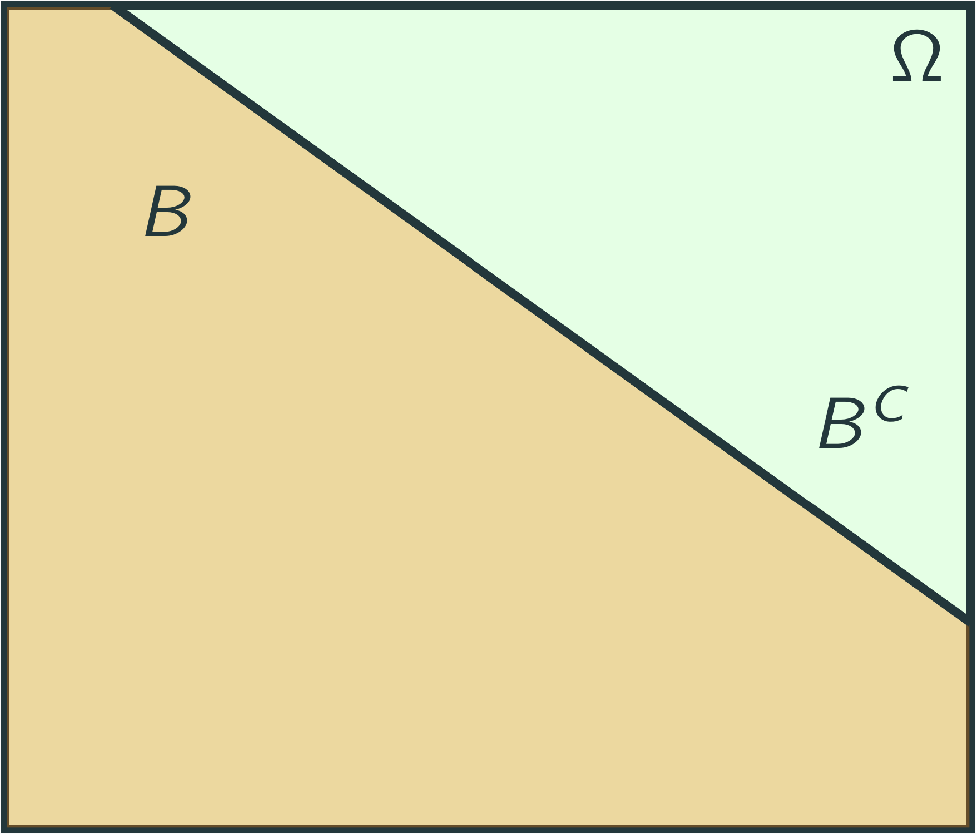

In [4]:
Image("../extra_files/partition2.png")

Al juntar esta información, tendríamos algo como la imagen a continuación:

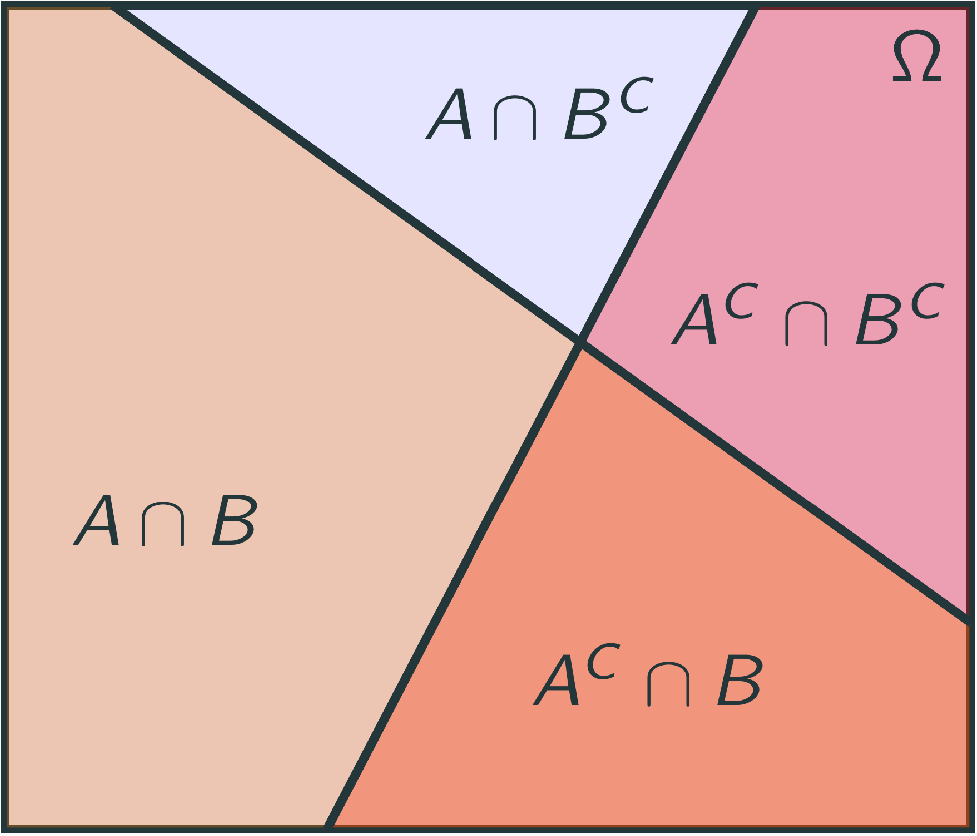

In [5]:
Image("../extra_files/intersections.png")

Puede ver que esto divide nuestros posibles resultados en 4 subconjuntos; Esto será importante cuando analicemos el problema más adelante.

### Experimento

El problema nos dice que estamos 90% seguros de que nuestro vecino regará nuestra planta. Esto significa que de cada 100 viajes, podemos esperar que nuestro vecino se olvide de regar la planta en solo 10 casos. Simulemos esta situación.

In [7]:
def simulate_trip(n):
    result = []
    for i in range(n):
        probabilities = ['A']*90 + ['B']*10
        result.append(random.choice(probabilities))
    return result

In [8]:
result = simulate_trip(1000)

In [9]:
total_A = result.count('A')
total_A

884

Para visualizar esto, usaremos un gráfico de pizza: la idea es verificar que, a pesar de nuestra intuición, el hecho de que la probabilidad de que nuestro vecino recuerde regar la planta sea del 90%, no significa que de cada 100 Viajes, recordarán exactamente en 90 de ellos. Lo que realmente significa es que la cantidad de veces que nuestro vecino recuerda *converge* al 90% a medida que aumentamos la cantidad de viajes. Hablando rigurosamente, diremos que

$$ P(\text{evento deseado}) = \lim_{n\to \infty} \frac{\text{número de resultados deseados}}{\text{Número total de repeticiones del experimento}}$$

Ahora, experimentemos con este concepto. Elija un número de repeticiones totales para nuestro experimento ("viajando"):

In [11]:
n = 100

Vamos a ejecutar este experimento:

In [12]:
labels = ['A', 'B']
nums = [0, 0]

result = simulate_trip(n)

fig, ax = plt.subplots()
# The line below prevents an empty plot after the animation
plt.close()

def update(num):
    ax.clear()
    ax.axis('equal')
    n_a = result[0:num].count('A')
    ax.pie([n_a, num-n_a], labels=labels, startangle=140, autopct='%1.1f%%')
    ax.set_title('Trip: {}'.format(num+1))

animated_pie = animation.FuncAnimation(fig, update, frames=range(n), repeat=False)
from IPython.display import HTML
HTML(animated_pie.to_jshtml())

Ahora, intentemos otra visualización para este problema:

In [13]:
n = 100

In [14]:
result = simulate_trip(n)

xdata, ydata = [], []
fig2, ax2 = plt.subplots(figsize=(9,6))
ln = ax2.scatter([], [], 500, marker='.', animated=True)
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, n))
plt.close(fig2)

def init():
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(0, 1.1)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.set_xticks([-0.25, 0.25])
    ax2.set_xticklabels(['A', 'B'])
    ax2.get_yaxis().set_visible(False)
    return ln,

def update(idx):
    xdata.append(bins[idx])
    ydata.append(counter[idx])
    colors = cmap(np.linspace(0, 1, len(xdata)))
    #offset = (np.arange(idx + 1) - idx + 29) / 30
    #y = np.maximum(ydata, offset)
    ln.set_offsets(np.array([xdata, ydata]).T)
    ln.set_facecolors(colors)
    return ln,

# bins return the indices of the bins to which each value in input array belongs.
# bins.shape = (n,)
# samples.shape = (n,)
# counter[idx] stores the index of the current sample in its respective bin;
# if the bin to which sample[idx] belongs is empty, it is the first to this
# bin, so counter[idx]=1
# else, if there are already n items in the bin, 
# counter[idx] = n+1
counter = np.zeros((n))  # y values
counts = np.zeros((2))  # keep track of how many points are already in each bin
bins = []
for idx in range(n):
    if result[idx] == 'A':
        counts[0] += 1
        bins.append(-0.25)
        counter[idx] = counts[0]
    else:
        counts[1] += 1
        bins.append(0.25)
        counter[idx] = counts[1]
counter = counter / n

# If you want to make a static plot, you can use
#ax2.scatter(bins, counter, 500, marker='.', facecolors=colors);

anim = animation.FuncAnimation(fig2, update, frames=n,
                     init_func=init, blit=True, interval=50)

ax2.text(-0.275, 1, result.count('A'), fontsize=11)
ax2.text(0.225, 0.3, n-result.count('A'), fontsize=11)

from IPython.display import HTML
HTML(anim.to_jshtml())

Por supuesto, hacer estas simulaciones lleva tiempo. Es por eso que para conjuntos finitos usaremos una definición más simple de probabilidad: para el evento $A$,
$$P(A) = \frac{\#A}{\#\Omega}.$$

**Recuerda: un modelo de probabilidad es siempre una aproximación a la realidad.**

## La probabilidad condicional

Volvamos a nuestro problema:

>Vas a salir de la ciudad y le pides a tu vecino que riegue tu planta favorita. Sin agua, tiene un 80% de posibilidades de morir. Con el agua, la probabilidad de que tu planta muera es del 15%. Tu estas 90% seguro de que tu vecino recordará regar la planta.
>1. ¿Cuál es la probabilidad de que tu planta esté viva cuando regrese?
>2. Si tu planta está muerta cuando llega, ¿cuál es la probabilidad de que tu vecino se haya olvidado de regarla?

En otras palabras, lo que buscamos se puede formalizar así: dados dos eventos $A$ y $B$ en un espacio muestral $\Omega$, la probabilidad de que $A$ y $B$ ocurran *al mismo tiempo* es $P(A\cap B)$, es decir
$$P(A\cap B) = \frac{\#(A\cap B)}{\#\Omega}.$$

Podemos ver esto en un diagrama de Venn:

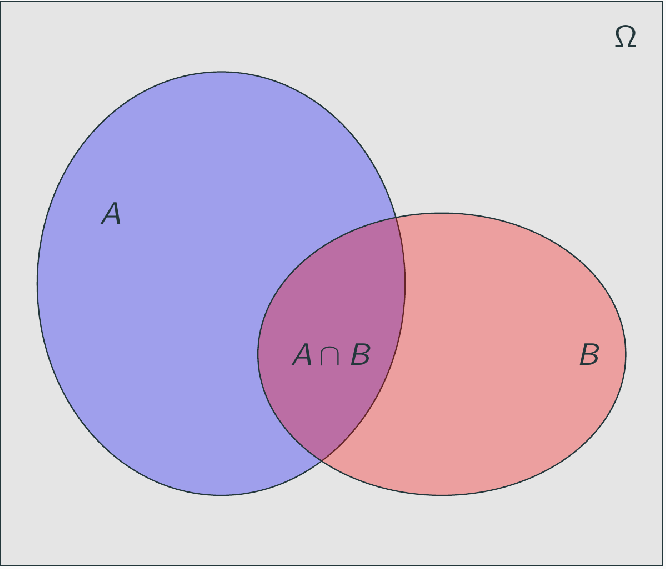

In [15]:
Image("../extra_files/condprob1.png")

Ahora, si estamos interesados en el caso de que $A$ ya haya pasado, y después de eso nos gustaría saber la probabilidad de que ocurra $B$, en realidad solo queremos considerar las ocurrencias de $B$ que están en la intersección. de $A$ y $B$. De hecho, estamos considerando un espacio muestral reducido:

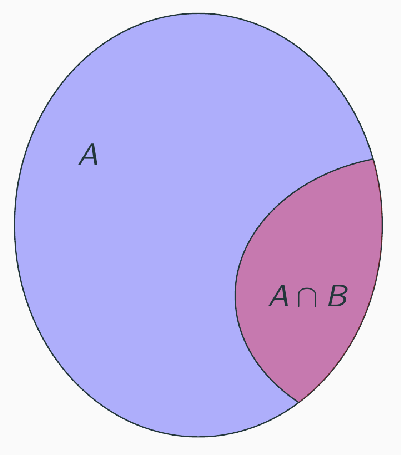

In [16]:
Image("../extra_files/condprob2.png")

Por lo tanto, la probabilidad de que ocurra $B$, ya que $A$ ya ha ocurrido, se calcula por
$$P(B|A) = \frac{\#(A\cap B)}{\# A} = \frac{\#(A\cap B)}{\#\Omega} \frac{\#\Omega}{\#A} = \frac{P(A\cap B)}{P(A)}.$$

$P(B|A)$ se lee como *la probabilidad de $B$ dada $A$*.

Intentemos entender lo que está sucediendo con un diagrama de árbol.

De nuestro problema, tenemos que:
- $P(\text{Planta viva}|\text{Vecino olvidó}) = \dfrac{20}{100}$
- $P(\text{Planta muerta}|\text{Vecino olvidó}) = \dfrac{80}{100}$
- $P(\text{Planta viva}|\text{Vecino recordó}) = \dfrac{85}{100}$
- $P(\text{Planta muerta}|\text{Vecino recordó}) = \dfrac{15}{100}$

Define $A = \{$Planta viva$\}$; $B = \{$Vecino recordó$\}$.

In [20]:
from igraph import *

p1 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p1'))
with p1:
    display(Latex('$P(A|B^C) = $'))

caixa_p1 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p1'))

p2 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p2'))
with p2:
    display(Latex('$P(A^C|B^C) = $'))

caixa_p2 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p2'))

p3 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p3'))
with p3:
    display(Latex('$P(A|B) = $'))

caixa_p3 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p3'))

p4 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p4'))
with p4:
    display(Latex('$P(A^C|B) = $'))

caixa_p4 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p4'))

caixa_h1 = widgets.HBox(children=[p1, caixa_p1],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )
caixa_h2 = widgets.HBox(children=[p2, caixa_p2],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )
caixa_h3 = widgets.HBox(children=[p3, caixa_p3],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )
caixa_h4 = widgets.HBox(children=[p4, caixa_p4],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )

caixa_vertical = widgets.VBox(children=[caixa_h1, caixa_h2, caixa_h3, caixa_h4])
display(caixa_vertical)

def adicionar_prob(caixa):
    labels_list.append(caixa.value)
    
labels_list = ["90/100", "10/100"]
caixa_p1.on_submit(adicionar_prob)
caixa_p2.on_submit(adicionar_prob)
caixa_p3.on_submit(adicionar_prob)
caixa_p4.on_submit(adicionar_prob)

def show_graph(button):
    visual_style = {}
    edges = [(0,2),(0,1), (1,3), (1,4), (2,5), (2,6)]
    vertices = ["", "Forgot", "Remembered", "Lived", "Died", "Lived", "Died"]
    g = Graph(vertex_attrs={"label": vertices, "label_size": 24}, edges=edges)
    # layout is a list of tuples containing X-Y coordinates
    layout = [(0,0), (1,1.5), (1,-1.5), (2,3), (2, 1), (2, -1), (2, -3)]
    visual_style["vertex_size"] = [150]
    g.vs["color"] = ["azure"]
    g.es["label"] = labels_list
    g.es["label_size"] = 20
    plot(g, bbox = (800, 800), margin = 100, **visual_style, layout=layout)

show_tree = widgets.Button(
                description='Show tree',
                tooltip='Show tree',
                layout=widgets.Layout(width='auto')
                )

show_tree.on_click(show_graph)
display(show_tree)

Button(description='Show tree', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='Show tree')

Los números asociados a cada nodo en el árbol representan las *probabilidades condicionales* del evento asociado.

De vuelta a nuestro problema, la pregunta es: ¿cuál es la probabilidad de que nuestra planta esté viva cuando regresemos?

Hay dos situaciones en las que la planta aún está viva: o nuestro amigo recordó y vivió, o nuestro amigo se olvidó y sobrevivió de todos modos.

Esta situación se puede ilustrar con el **teorema de probabilidades totales**, que dice que

*Si $E$ Es un evento en la unión de conjuntos desunidos $A_1, A_2, \ldots, A_n$ y $P(A_i)>0$ para todo $i=1,2,  \ldots, n$, entonces*
    \begin{equation*}
        P(E) = P(A_1)P(E|A_1) + P(A_2)P(E|A_2) + \ldots + P(A_n)P(E|A_n).
    \end{equation*}
    
Ahora, recordando la imagen que hicimos antes, ya que $B\cap B^C = \emptyset$, tenemos que

$$P(A) = P(A|B)P(B) + P(A|B^C)P(B^C)$$

Mirando nuestro diagrama de árbol, podemos ver que

$$P(A) = \frac{85}{100}\frac{90}{100}+\frac{20}{100}\frac{10}{100} = \frac{157}{200},$$

that is,

In [11]:
157/200

0.785

Para la segunda pregunta, *Si tu planta está muerta cuando llega, ¿cuál es la probabilidad de que su vecino se haya olvidado de regarla?*

Aquí, necesitamos cambiar la posición de los eventos en la ecuación de probabilidad condicional; Para eso, necesitamos el teorema de Bayes.